<a href="https://colab.research.google.com/github/kookeej/DILAB/blob/main/7.29-8.11/keyword_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

키워드 분석 (Keyword Analysis)
===
> Reference    
>> https://www.youtube.com/watch?v=5P6nG8xHKbU&list=PL7ZVZgsnLwEEoHQAElEPg7l7T6nt25I3N&index=2

* 텍스트 자료의 중요한 내용을 압축적으로 제시하는 단어 또는 문구를 ```핵심어``` 또는 ```키워드```라고 한다.     
* ```키워드 분석```이란, 불용어 제거와 어간 추출 및 형태소 분석 등의 자연어 처리를 시행한 후, 텍스트에서 많이 등장하는 형태소의 등장 빈도를 분석함으로써 핵심어를 추출한다.
* 특정 텍스트 자료에 많이 나타나는 형태소가 그 텍스트 주제를 표현할 가능성이 높다는 가정에 기초한다.
* 빈도 분석에서는 영어의 전치사나 한국어의 조사와 같은 불용어는 제거한다.
* 텍스트의 주제 추정, 텍스트 유사도, 검색 엔진의 검색 결과 우선 순위 측정 등에 사용된다.    



## 한글 폰트 설정
실행 후 런타임 재시작 필요하다.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

%config InlineBackend.figure_format='retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


## 한국어 자연어 처리 konlpy와 형태소 분석기 MeCab 설치


In [ ]:
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

# 1. 네이버 영화 리뷰 데이터
실제 네이버 영화 리뷰 데이터를 사용해서 키워드 분석을 해본다.
* 데이터 다운로드 https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt



In [17]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

데이터를 확인해보니 보두 바이트로 이루어져 있다. 또한 리뷰 이외에도 다른 데이터도 존재한다.    
데이터를 문자열로 변환하고 리뷰만 추출해보자.

In [18]:
raw = [x.decode() for x in raw[1:]]
# 이미 디코딩 되었고 더 이상 디코딩을 할 필요가 없다.
# raw = [x for x in raw[1:]]

reviews = []
for i in raw:
    reviews.append(i.split('\t')[1])

print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


## 형태소 분석을 이용한 명사 추출
형태소 분석기 Mecab으로 명사만 추출한다.

In [19]:
from konlpy.tag import Mecab
tagger = Mecab()

nouns = []
for review in reviews:
    for noun in tagger.nouns(review):
        nouns.append(noun)

nouns[:10]

['때', '디자인', '학생', '외국', '디자이너', '그', '전통', '발전', '문화', '산업']

우리가 추출한 명사를 살펴보면 불필요한 단어가 많다는 것을 확인할 수 있다. 따라서 사용자가 직접 불용어 사전을 만들어서 적용시키는 것이 필요하다.

## 불용어(stopwords)사전 만들기
우리는 형태소 분석을 통해 조사, 접속사 등과 같은 불용어들을 제거할 수 있었다. 하지만 한국어에는 명사에도 많은 불용어들이 포함되어 있다. 따라서 사용자가 직접 불용어 사전을 유지하면서 불필요한 단어를 제거할 필요가 있다.
* 불용어의 예: 전, 날, 일, 걸, 뭐, 줄, 만, 건, 분, 개, 끝, 잼, 이거, 번, 중, 듯, 때, 게, 내, 말, 나, 수, 거, 점, 것    

하지만 '영화'와 빈도가 너무 커서 분석에 방해되는 단어도 제거할 필요가 있다.

In [24]:
stop_words = "전 날 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것 영화"
stop_words = stop_words.split(' ')
print(stop_words)

['전', '날', '일', '걸', '뭐', '줄', '만', '건', '분', '개', '끝', '잼', '이거', '번', '중', '듯', '때', '게', '내', '말', '나', '수', '거', '점', '것', '영화']


## 불용어를 제외하여 형태소 분석 수행
한글 텍스트에 대하여 형태소 분석을 수행한다. 분석으로 추출되는 명사 중에서 불용어에 포함되지 않은 텍스트만 추출하여 저장한다.

In [25]:
nouns = []
for review in reviews:
    for noun in tagger.nouns(review):
        if noun not in stop_words:
            nouns.append(noun)

nouns[:10]

['디자인', '학생', '외국', '디자이너', '그', '전통', '발전', '문화', '산업', '우리']

## 단어 빈도수 측정
단어 빈도수 측정에는 ```collections``` 라이브러리의 ```Counter``` 함수를 이용한다. ```collection``` 라이브러리는 내장 라이브러리로 별도 설치가 필요 없다. ```counter```를 이용하면 각 단어와 각 단어의 빈도 수를 딕셔너리로 편리하게 생성 가능하다.

In [27]:
from collections import Counter

nouns_counter = Counter(nouns)

# 가장 빈도수가 높은 top 50만 .most_common모듈을 사용하여 top_nouns에 저장한다.
top_nouns = dict(nouns_counter.most_common(50))
top_nouns

{'감독': 5629,
 '감동': 6489,
 '결말': 2066,
 '공포': 2048,
 '굿': 2110,
 '기대': 3465,
 '기억': 2364,
 '난': 2189,
 '남자': 2078,
 '내용': 5731,
 '년': 4936,
 '돈': 2980,
 '드라마': 6896,
 '때문': 2371,
 '마음': 2128,
 '마지막': 3647,
 '명작': 2685,
 '배우': 5893,
 '사람': 6742,
 '사랑': 4741,
 '생각': 6943,
 '스토리': 7163,
 '시간': 5320,
 '쓰레기': 4585,
 '애': 2730,
 '액션': 3568,
 '여자': 2678,
 '연기': 9175,
 '연출': 2376,
 '우리': 2531,
 '이건': 3650,
 '이게': 3046,
 '이상': 2676,
 '이야기': 2947,
 '이해': 2745,
 '인생': 2060,
 '작품': 3985,
 '장면': 3262,
 '재미': 5479,
 '전개': 2035,
 '정도': 3656,
 '주인공': 2553,
 '처음': 2673,
 '최고': 8813,
 '최악': 3019,
 '편': 3044,
 '평점': 8514,
 '하나': 3923,
 '한국': 2640,
 '현실': 2193}

## 단어 빈도 시각화

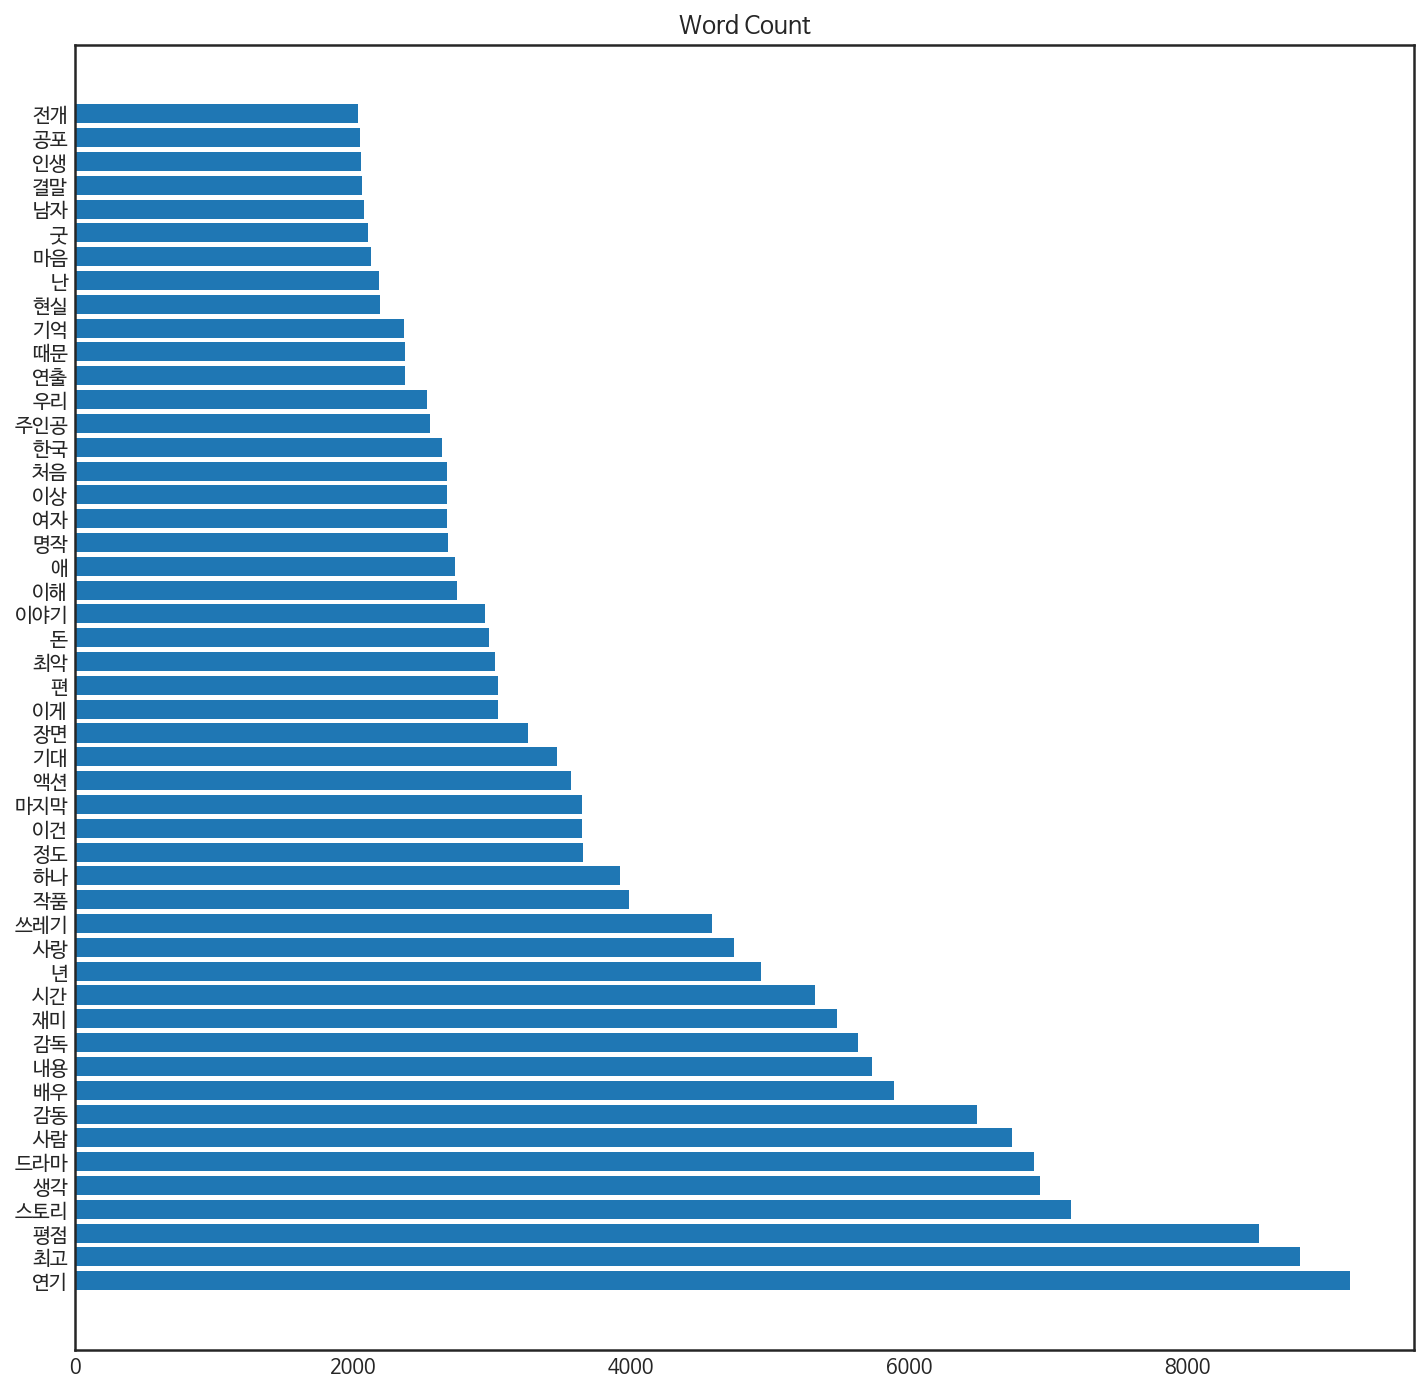

In [30]:
import numpy as np

y_pos = np.arange(len(top_nouns))

plt.figure(figsize=(12, 12))
plt.barh(y_pos, top_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos, top_nouns.keys())
plt.show()

```연기``` 키워드가 가장 높게 나왔다.    

하지만 히스토그램 형태보다는 워크 클라우드(WordCloud)형태로 보는 것이 아직까지는 유행이다. 

## 워드 클라우드(WordCloud)
* 텍스트에 담겨 있는 여러 형태소들의 등장 빈도를 가장 직관적으로 시각화 하는 방법이다.
* 텍스트에 등장하는 단어를 그 등장 빈도에 따라 **서로 크기가 다르게 구름 형태로 표현함**으로써 단어의 빈도수를 한 눈에 알 수 있다.    

최근에 많은 서비스들이 어떤 핵심어가 많이 등장했는지를 워드 클라우드 형식으로 시각화하고 있다. 하지만 빈도수만을 시각적으로 표현한 것이기 때문에 단어들 사이의 연관성이나 의미 구조 등을 분석하는 데에는 한계가 있다.   

파이썬에서 워드클라우드를 시각화하기 위해 ```matplotlib``` 라이브러리와 ```WordCloud``` 라이브러리를 import하여 사용한다. ```WordCloud``` 라이브러리는 ```pip install wordcloud``` 명령어를 통해 설치가 필요하다.

In [31]:
!pip install wordcloud

In [32]:
# WordCloud를 이용하여 객체를 생성하고 generate_from_frequencies() 함수로 빈도수에 따라 워드 쿨라우드를 생성한다.
from wordcloud import WordCloud

# font 지정을 꼭 해주어야 한다.
wc = WordCloud(background_color='white', font_path='./font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_nouns)
# wordcloud 객체 생성 완료

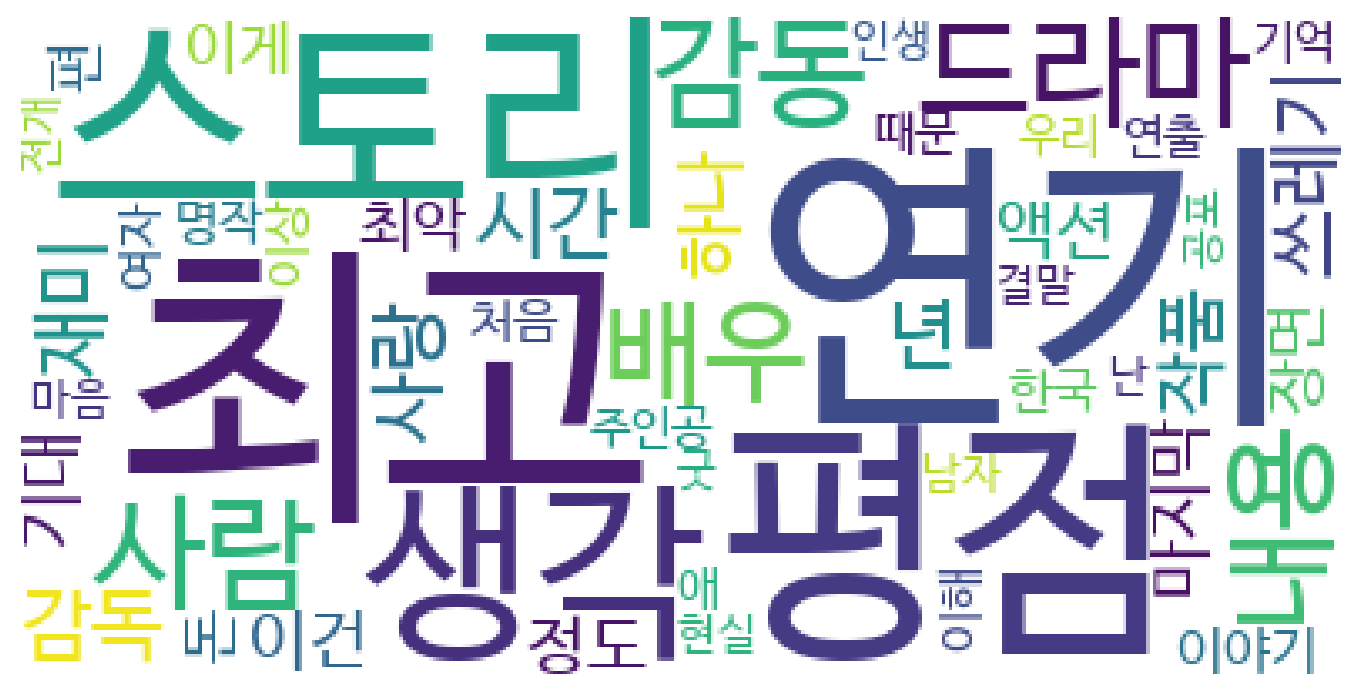

In [34]:
# imshow()를 사용하여 시각화
figure = plt.figure(figsize=(12, 12))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)
plt.show()

가장 눈에 띄는 키워드들은 ```연기```, ```최고```, ```스토리```, ```평점```, ```감동```, ```드라마```다.    

또 다른 시각화 방법이 있다.

## squarify 트리맵 시각화
* ```squarify```는 트리맵 생성을 지원해주는 파이썬 라이브러리다.
* ```squarify```라이브러리를 이용하여 키워드와 키워드 빈도수를 트리맵으로 나타낸다.

In [35]:
!pip install squarify

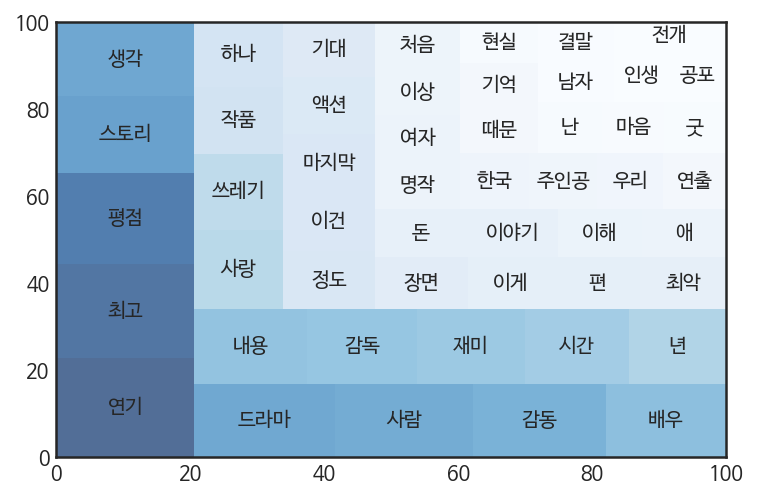

In [36]:
import squarify

# 데이터를 0~1사이로 정규화한다.
norm = mpl.colors.Normalize(vmin=min(top_nouns.values()),
                            vmax=max(top_nouns.values()))

# matplotlib의 colormap Blues
# 빈도에 따라 어떤 색을 가져가야 하는지 알려줌
colors = [mpl.cm.Blues(norm(value)) for value in top_nouns.values()]
squarify.plot(label=top_nouns.keys(),
              sizes=top_nouns.values(),
              color=colors,
              alpha=.7)